In [1]:
%load_ext autoreload
%autoreload

# %matplotlib ipympl

# MRS01_section_02

In [2]:
# import rozneho potrebneho...
exec(open('celljobs/MRS01_imports.py', encoding='utf-8').read())

### Príklad využitia výpočtového softvéru pre časť 2.2

(nadväzuje sa tu na text MRS01)

Na tomto obrázku (v texte MRS01)
![obr](fig/cv01_fig_1.png)

je znázornená funkcia

$$
    Q(t)   =  Q_0 \ e^{\left( - \frac{1}{RC} t \right)}   
$$

Samozrejme, s dosadenými konkrétnymi hodnotami.


Ak by sme chceli túto funkciu graficky znázorniť s využitím jazyka Python (avšak v princípe akéhokoľvek skriptovacieho jazyka), v rámci ktorého využijeme knižnice NumPy a Matplotlib, mohlo by to vyzerať nasledovne:



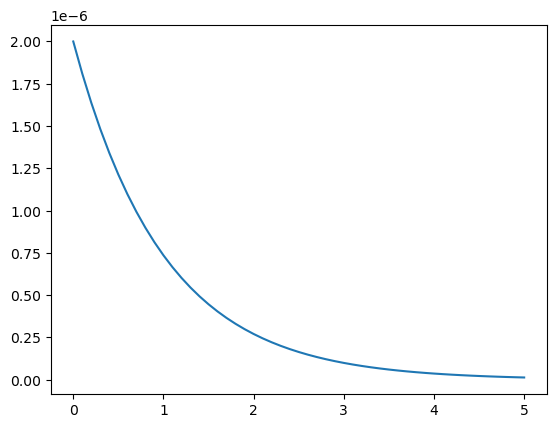

In [3]:
timeVect = np.arange(0,5.1,0.1)

R = 10**6
C = 10**-6
Q_0 = 2*10**-6

riesFcia = Q_0 * np.exp( (-1.0/(R*C)) * timeVect )

plt.figure(1)
plt.plot(timeVect, riesFcia)

Samotná časová funkcia $Q(t) $ je analytickým riešením diferenciálnej rovnice (v zmysle textu MRS01). Ako však bez znalosti tohto analytického riešenia získať uvedený obrázok (teda ako vyriešiť diferenciálnu rovnicu)?

Len ako prvý kontakt tu uveďme istý spôsob získania tzv. numerického riešenia diferenciálnej rovnice. Tejto a súvisiacim témam sa budeme podrobne venovať v ďalších textoch, tu nech je to len takpovediac prvá ukážka.

V prvom rade vytvorme funkciu, ktorá bude realizovať to čo „robí“ (bez ďalšieho písomného vysvetlenia v tomto texte) diferenciálna rovnica, teda:

In [4]:
def fcn_difRovnica_01(x, t, param):

    R, C = param
    Q = x
    dotQ = (-1.0/(R*C)) * Q

    return dotQ 

Túto funkciu využije istý nástroj, ktorý je schopný zostaviť numerické riešenie - tu konkrétne nájde y-súradnice k požadovaným x-súradniciam. X-súradnice sú v tomto prípade čas (na x-osi je čas). Uvedený nástroj sa nazýva *ODE solver* - „riešič“ obyčajných diferenciálnych rovníc. Zrealizujme nasledovné:

In [5]:
def fcn_simSch_01(t_start, t_final, T_s, param):

    R, C = param

    #-----------------------------------------
    t_log = np.arange(sim_t_start, sim_t_final+sim_T_s, sim_T_s).reshape(-1,1)

    #-----------------------------------------
    Q_0 = C * u_0

    #-----------------------------------------
    odeOut = odeint(fcn_difRovnica_01,
                    Q_0,
                    t_log[:,0],
                    args=(param,)
                    )

    return [t_log, odeOut] 

Máme teda funkciu, ktorej „povieme“ `t_start, t_final, T_s`, teda časové hodnoty od-do kedy chcem mať numerické riešenie a s akým časovým krokom. Ďalej v nej vieme zadávať (meniť) parametre `param`, čo, ako vidíme, sú v tomto prípade parametre systému, ktorým sa tu zaoberáme (elektrický odpor $R$ a kapacita $C$). ODE solver sa tu nazýva `odeint`.

Túto funkciu sme nazvali, že „simulácia“, pretože v istom zmysle ide o simuláciu dynamického systému. Nastavme teda túto pomyselnú simuláciu:

In [6]:
# Nastavenia simulacie

sim_t_start = 0
sim_t_final = 5
sim_T_s = 0.05

# ------------

param_C = 10**-6
param_R = 10**6
u_0 = 5

param = [param_R, param_C] 

Zavolaním danej funkcie tú simuláciu vykonajme:

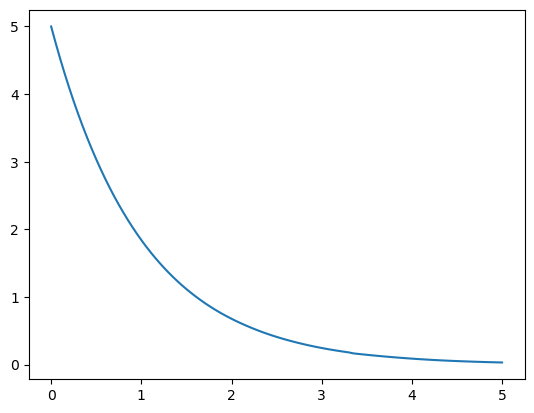

In [7]:
# Simulacia

t_log, x_log, = fcn_simSch_01(sim_t_start, sim_t_final, sim_T_s, param)

sig_napatie = x_log[:,0] * (1/param_C)

plt.figure(2)
plt.plot(t_log, sig_napatie) # kreslenie jednoduch. obr. 

Týmto sme ukázali príklad využitia výpočtového softvéru v téme, ktorej sa venuje text MRS01.